In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [63]:
#Summary information and metrics for listings in Amsterdam (good for visualisations).
listings = pd.read_csv('./datasets/listings.csv', index_col=0)
#Neighbourhood list for geo filter. Sourced from city or open source GIS files.
calendar = pd.read_csv('./datasets/calendar.csv', index_col=0)
#Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).
reviews = pd.read_csv('./datasets/reviews.csv', index_col=0)

listings['review_scores_rating'].head(10)

listings.shape


C:\Users\TobiasVerleger\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(3585, 94)


# Thesis
2. Do higher prices lead to more reviews ? 
3. Does the gender of the host influence the reviews ?  

Can we predict number/quality of reviews by prices/gender  ?
 
## What needs to be done ? 
* check if numver_of_reviews has NaN values 
* drop Columns with all NaN





In [29]:
ratio_of_nan= np.sum(listings.isnull())/listings.shape[0]
ratio_of_nan[ratio_of_nan>0.5]


notes                           0.550907
neighbourhood_group_cleansed    1.000000
square_feet                     0.984379
weekly_price                    0.751185
monthly_price                   0.752301
security_deposit                0.625662
has_availability                1.000000
license                         1.000000
jurisdiction_names              1.000000
dtype: float64

Drop columns which are all  Nan or more than 90%

In [66]:
listing_cleaned=listings.drop(['neighbourhood_group_cleansed','has_availability','license','jurisdiction_names','square_feet'], axis= 1)
listing_cleaned.shape


(3585, 89)

Add a host gender column using https://gender-api.com/

In [100]:

import gender_guesser.detector as gender
d = gender.Detector()

hostnames=listing_cleaned['host_name']

def genderize (row):
    if d.get_gender(row['host_name'])=='female':
        return 'Female'
    else: 
        return 'Male'
    

listing_cleaned['host_gender'] = listing_cleaned.apply (lambda row: genderize(row), axis=1)


ratio_of_nan= np.sum(listing_cleaned.isnull())/listing_cleaned.shape[0]
ratio_of_nan['price']



    

0.0

Male      0.658577
Female    0.341423
Name: host_gender, dtype: float64


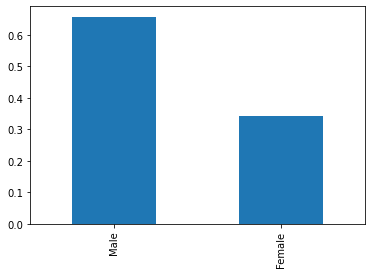

In [68]:

status_vals =  listing_cleaned['host_gender'].value_counts()
print(status_vals/listing_cleaned.shape[0])
(status_vals/listing_cleaned.shape[0]).plot(kind="bar",);


In [74]:

female = listing_cleaned[listing_cleaned['host_gender']=='Female']
male = listing_cleaned[listing_cleaned['host_gender']=='Male']
score_female =female['review_scores_value'].mean()
score_male=male['review_scores_value'].mean()

print(score_female)
print(score_male)

9.179888268156425
9.162653825575173


The gender seems not to influence the review score. Whatsoever 65 % of the hosts seem to be male and only 35 % Female

In [99]:

listing_cleaned['pice_number'] = listing_cleaned['price'].apply(lambda x: float(x.strip('$').replace(',','')) )

listing_cleaned[['price','neighbourhood']].groupby('neighbourhood').mean()


DataError: No numeric types to aggregate

In [70]:


X = listings[['host_gender','price' , 'availability_365']]
y = listings['reviews_per_month']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) #Fit

y_test_preds = lm_model.predict(X_test) 

y_test_preds
print( len(y_test))
print(r2_score(y_test, y_test_preds))
#sns.heatmap(listings.corr(), annot=True, fmt=".2f");

KeyError: "['host_gender'] not in index"